# Plot PMF function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_PMF(fig, ax, A, i=0, size=16, name="", p=""):
  xk = np.arange(size)
  pk = tuple(A)
  custm = stats.rv_discrete(name='custm', values=(xk[::-1], pk))
  
  v = [-0.44, -0.22, 0,  0.22, 0.44]
  ax.bar(xk-(v[i]*0.8), custm.pmf(xk), label=name, width = 0.18, hatch=p, alpha=0.7)

# Probability of bit 1 for each position function

In [2]:
import numpy as np

def prob_by_pos(A, bits=16):
  binary = []
  for i in range(len(A)):
    row = []
    for j in range(len(A)):
      row.append([int(x) for x in np.binary_repr(A[i][j].astype(int), width=bits)])
    binary.append(row)

  prob = [0 for _ in range(bits)]
  for i in range(len(A)):
    for j in range(len(A)):
      for k in range(bits):
        prob[k] += binary[i][j][k]

  sum = 0
  for i in range(bits): sum += prob[i]
  for i in range(bits): prob[i] /= sum
  
  return prob

# Sobel Filter function

In [3]:
def sobel_filter(input_image):
  # Here we define the matrices associated with the Sobel filter
  Gx = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
  Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
  [rows, columns] = np.shape(input_image)  # we need to know the shape of the input grayscale image
  sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

  binary = []
  index = 0
  # Now we "sweep" the image in both x and y directions and compute the output
  for i in range(rows):
      for j in range(columns):
          if ((i < 1) or (i > rows - 2) or (j < 1) or (j > columns - 2)):
              sobel_filtered_image[i][j] = 0
          else:
              gx = 0
              gy = 0
              for m in range(-1, 2, 1):
                for n in range(-1, 2, 1):
                   pixel = input_image[i + m][j + n]
                   gx = gx + (pixel * Gx[m + 1][n + 1])
                   row = [int(x) for x in np.binary_repr(gx.astype(int), width=16)]
                   binary.append(row)
                   index += 1
                   gy = gy + (pixel * Gy[m + 1][n + 1])
                   row = [int(x) for x in np.binary_repr(gx.astype(int), width=16)]
                   binary.append(row)
                   index += 1

              if gx < 0:
                gx = -gx
              if gy < 0:
                gy = -gy
              sum = gx + gy
              if sum > 255:
                sum = 255 
              sobel_filtered_image[i][j] = sum

  prob = [0 for _ in range(16)]
  for i in range(index):
    for k in range(16):
      prob[k] += binary[i][k]

  sum = 0
  for i in range(16): sum += prob[i]
  for i in range(16): prob[i] /= sum

  print("ok")
  return prob, sobel_filtered_image

# Plots main code

Airplane
ok
Baboon
ok
Elaine
ok
Peppers
ok
Splash
ok


<ipython-input-4-4cafed550cb2>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-4-4cafed550cb2>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
<ipython-input-4-4cafed550cb2>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


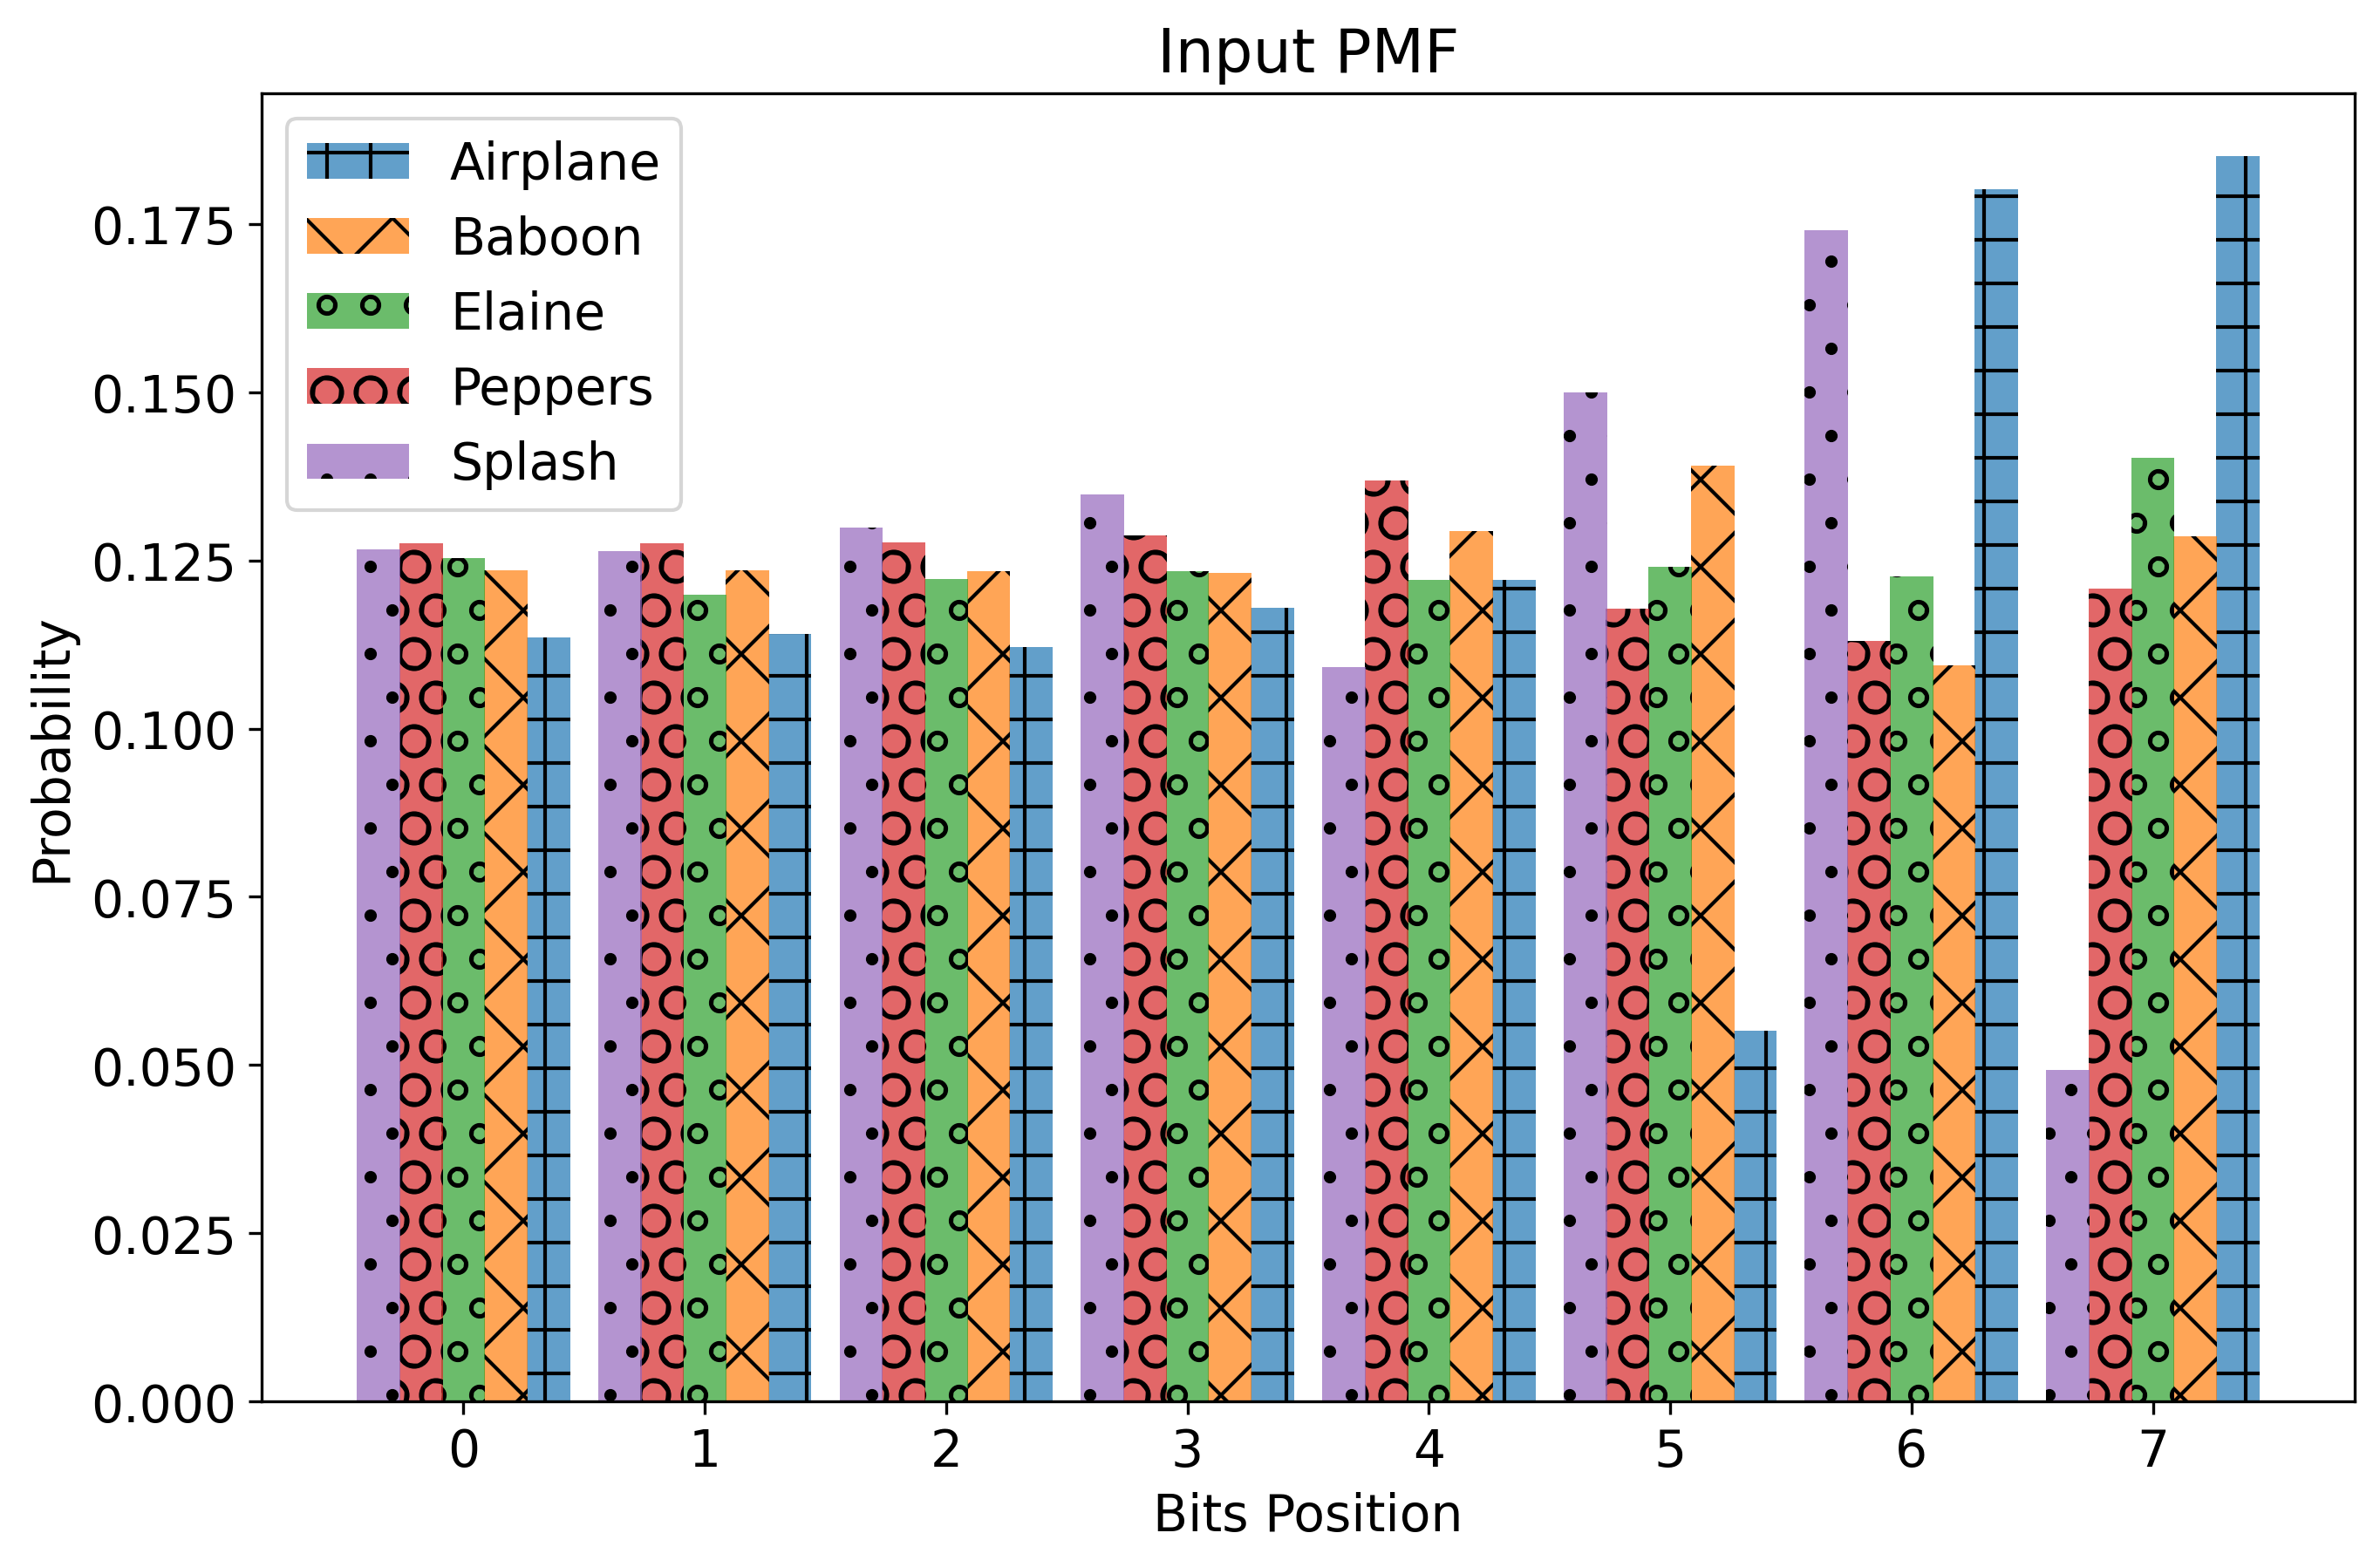

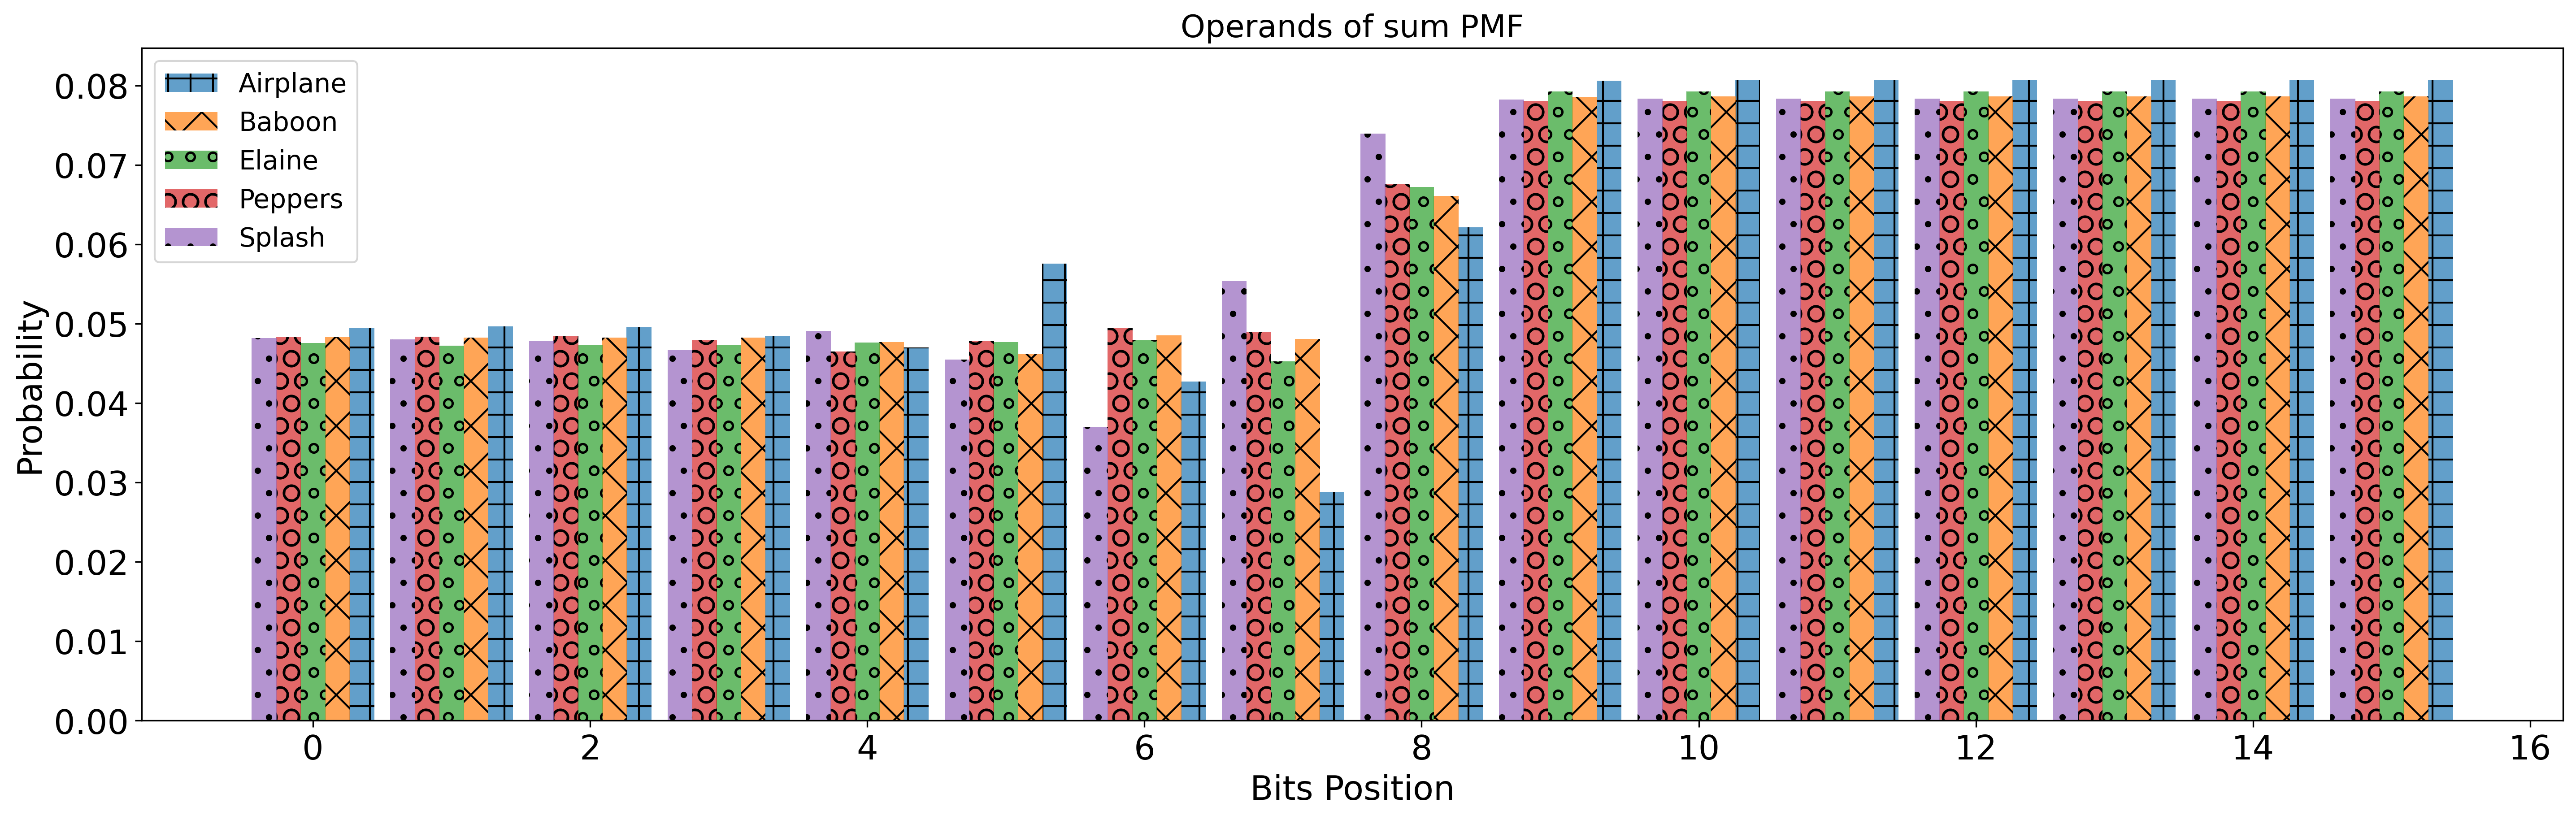

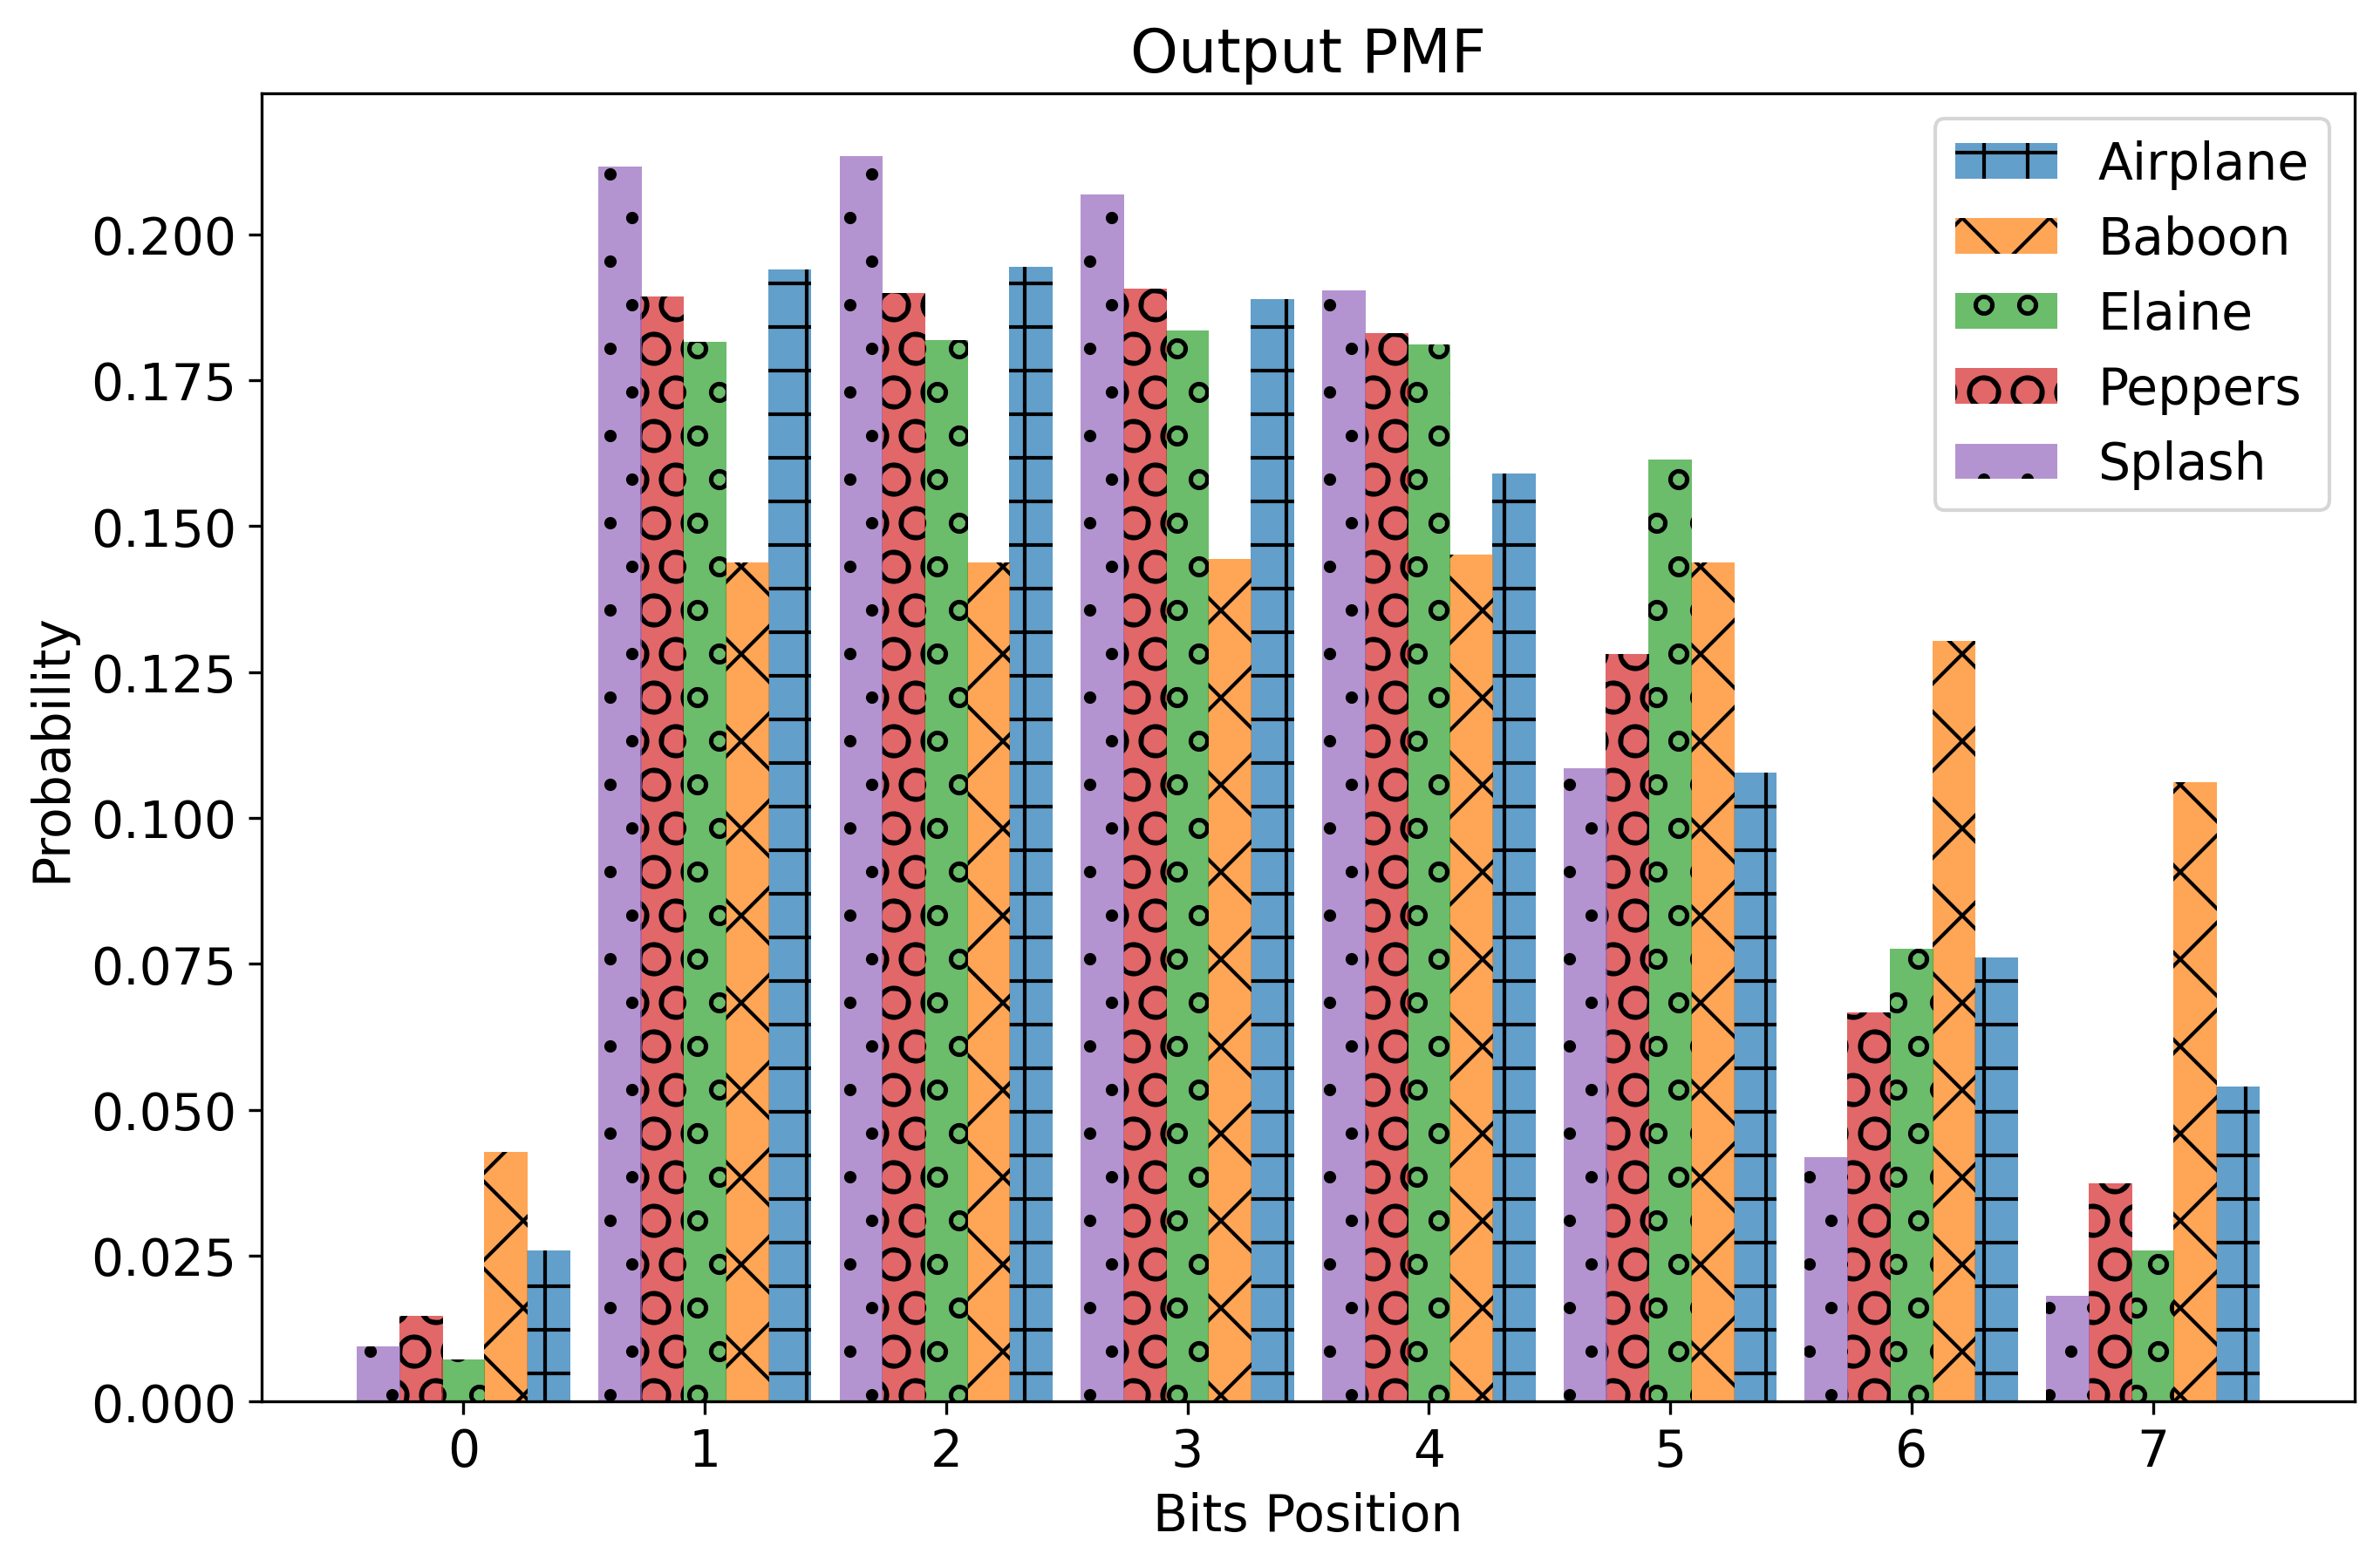

In [4]:
from pylab import rcParams
rcParams['font.size'] = 14
rcParams['figure.dpi'] = 300


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from math import trunc

cases = ['Airplane', 'Baboon', 'Elaine', 'Peppers', 'Splash']
patterns = [ "+" , "x", "o", "O", ".", "*", "/" , "\\" , "|" , "-"  ]

fig1 = plt.figure(1, figsize=(8,5))
ax1 = fig1.add_axes([0,0,1,1])

rcParams['font.size'] = 18
fig2 = plt.figure(2, figsize=(18,5))
ax2 = fig2.add_axes([0,0,1,1])

rcParams['font.size'] = 14
fig3 = plt.figure(3, figsize=(8,5))
ax3 = fig3.add_axes([0,0,1,1])

for i, case in enumerate(cases):
  print(case)
  image_file = case + "/" + case + ".png"
  input_image = np.asarray(Image.open(image_file))

  plot_PMF(fig1, ax1, prob_by_pos(input_image, bits=8), i=i, size=8, name=case, p=patterns[i])  

  prob, sobel_filtered_image = sobel_filter(input_image)
  plot_PMF(fig2, ax2, prob, name=case, i=i, p=patterns[i])

  plot_PMF(fig3, ax3, prob_by_pos(sobel_filtered_image, bits=8), i=i, size=8, name=case, p=patterns[i])

ax1.set_title('Input PMF')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Bits Position')
ax1.legend(loc='upper left')
fig1.savefig('input-PMF.pdf', bbox_inches = 'tight')
fig1.show()

ax2.set_title('Operands of sum PMF')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Bits Position')
ax2.legend(loc='upper left')
fig2.savefig('operands-PMF.pdf', bbox_inches = 'tight')
fig2.show()

ax3.set_title('Output PMF')
ax3.set_ylabel('Probability')
ax3.set_xlabel('Bits Position')
ax3.legend(loc='upper right')
fig3.savefig('output-PMF.pdf', bbox_inches = 'tight')
fig3.show()